Plots to show how the methods work for highly eccentric seob waveforms

In [1]:
import sys
sys.path.append("../../")
%load_ext autoreload
%autoreload 2

In [2]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict, lstyles, lwidths
import matplotlib.pyplot as plt
import numpy as np
from measureEccentricity.utils import get_peak_via_quadratic_fit
import matplotlib as mpl

/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### Create eccentric waveforms using seobnrv4ehm

In [3]:
from EccTests.TestEOBvsMeasuredEcc.seobnrv4ehm import get_modes
import lal

In [4]:
available_param_sets = {
    "1": [1, 0, 0],
    "2": [2, 0.5, 0.5],
    "3": [4, -0.6, -0.6],
    "4": [6, 0.4, -0.4]}

In [5]:
M = 50
MT = M * lal.MTSUN_SI
key = "4"
params = available_param_sets[key]
q = params[0]
chi1 = params[1]
chi2= params[2]
eccentric_anomaly=np.pi/2
EccIC=-1
delta_t = 1 / 4096
Momega0_zeroecc = 0.002
f_low_zeroecc = Momega0_zeroecc/np.pi/MT
tzeroecc, hlmzeroecc = get_modes(delta_t=delta_t, q=q, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=0, eccentric_anomaly=eccentric_anomaly, EccIC=EccIC, f_min=f_low_zeroecc, physical_units=False, save=False)
tzeroecc = tzeroecc - get_peak_via_quadratic_fit(tzeroecc, np.abs(hlmzeroecc[(2, 2)]))[0]
    
def getDataDict(Momega0, ecc):
    f_low = Momega0/np.pi/MT
    tecc, hlmecc = get_modes(delta_t=delta_t, q=q, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=ecc, eccentric_anomaly=eccentric_anomaly, EccIC=EccIC, f_min=f_low, physical_units=False, save=False)
    tecc = tecc - get_peak_via_quadratic_fit(tecc, np.abs(hlmecc[(2, 2)]))[0]
    startzero = np.argmin(np.abs(tzeroecc - tecc[0])) - 10
    dataDict = {"t": tecc, "hlm": hlmecc, "t_zeroecc": tzeroecc[startzero:], "hlm_zeroecc":{(2, 2): hlmzeroecc[(2, 2)][startzero: ]}}
    return dataDict

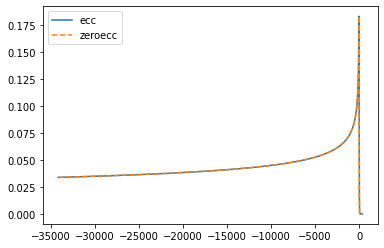

In [6]:
datadict = getDataDict(0.01, 1e-7)
plt.plot(datadict["t"], np.abs(datadict["hlm"][(2, 2)]), label="ecc")
plt.plot(datadict["t_zeroecc"], np.abs(datadict["hlm_zeroecc"][(2, 2)]), label="zeroecc", ls="--")
plt.legend()

In [7]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

In [8]:
from tqdm import tqdm

### Test the `ResidualAmplitude` method from ecc=1e-7 to ecc=1 with `treat_mid_points_between_peaks_as_troughs=True` and `False`

In [52]:
eobEccs = 10**np.linspace(-7, 0., 150)
method = "ResidualAmplitude"
measuredEccsTrue = []
eEOBTrue = []
measuredEccsFalse = []
eEOBFalse = []
for EOBecc in tqdm(eobEccs):
    print(EOBecc)
    dataDict = getDataDict(0.01, EOBecc)
    tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
    for case in [True, False]:
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": case})
            if case:
                measuredEccsTrue.append(ecc[0])
                eEOBTrue.append(EOBecc)
            else:
                measuredEccsFalse.append(ecc[0])
                eEOBFalse.append(EOBecc)
        except Exception:
            print(f"failed for {EOBecc} for {method}.")

  0%|                                                                                                                                                                                      | 0/150 [00:00<?, ?it/s]

1e-07


/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:425: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
  1%|█▏                                                                                                                                                                            | 1/150 [00:03<07:30,  3.02s/it]

1.1142428752325099e-07


  1%|██▎                                                                                                                                                                           | 2/150 [00:05<07:04,  2.87s/it]

1.2415371850064104e-07


  2%|███▍                                                                                                                                                                          | 3/150 [00:08<07:02,  2.87s/it]

1.3833739627296223e-07


  3%|████▋                                                                                                                                                                         | 4/150 [00:11<06:56,  2.85s/it]

1.5414145817536454e-07


  3%|█████▊                                                                                                                                                                        | 5/150 [00:14<06:48,  2.82s/it]

1.7175102154984983e-07


  4%|██████▉                                                                                                                                                                       | 6/150 [00:16<06:42,  2.79s/it]

1.9137235207582544e-07


  5%|████████                                                                                                                                                                      | 7/150 [00:19<06:37,  2.78s/it]

2.1323527981697593e-07


  5%|█████████▎                                                                                                                                                                    | 8/150 [00:22<06:33,  2.77s/it]

2.3759589128427652e-07


  6%|██████████▍                                                                                                                                                                   | 9/150 [00:25<06:29,  2.76s/it]

2.647395290480231e-07


  7%|███████████▌                                                                                                                                                                 | 10/150 [00:28<06:28,  2.77s/it]

2.949841340341698e-07


  7%|████████████▋                                                                                                                                                                | 11/150 [00:30<06:32,  2.83s/it]

3.286839696542055e-07


  8%|█████████████▊                                                                                                                                                               | 12/150 [00:33<06:27,  2.81s/it]

3.662337713903369e-07


  9%|██████████████▉                                                                                                                                                              | 13/150 [00:36<06:21,  2.78s/it]

4.0807337044121557e-07


  9%|████████████████▏                                                                                                                                                            | 14/150 [00:39<06:17,  2.78s/it]

4.5469284558624114e-07


 10%|█████████████████▎                                                                                                                                                           | 15/150 [00:41<06:14,  2.77s/it]

5.066382636136649e-07


 11%|██████████████████▍                                                                                                                                                          | 16/150 [00:44<06:09,  2.76s/it]

5.645180755516963e-07


 11%|███████████████████▌                                                                                                                                                         | 17/150 [00:47<06:06,  2.76s/it]

6.290102436234467e-07


 12%|████████████████████▊                                                                                                                                                        | 18/150 [00:50<06:03,  2.75s/it]

7.008701824056906e-07


 13%|█████████████████████▉                                                                                                                                                       | 19/150 [00:52<06:00,  2.75s/it]

7.809396072084504e-07


 13%|███████████████████████                                                                                                                                                      | 20/150 [00:55<05:57,  2.75s/it]

8.701563933188907e-07


 14%|████████████████████████▏                                                                                                                                                    | 21/150 [00:58<05:55,  2.76s/it]

9.695655615935915e-07


 15%|█████████████████████████▎                                                                                                                                                   | 22/150 [01:01<05:52,  2.76s/it]

1.0803315190764665e-06


 15%|██████████████████████████▌                                                                                                                                                  | 23/150 [01:03<05:49,  2.75s/it]

1.2037516980200695e-06


 16%|███████████████████████████▋                                                                                                                                                 | 24/150 [01:06<05:47,  2.76s/it]

1.3412717530678983e-06


 17%|████████████████████████████▊                                                                                                                                                | 25/150 [01:09<05:45,  2.76s/it]

1.494502494606524e-06


 17%|█████████████████████████████▉                                                                                                                                               | 26/150 [01:12<05:41,  2.76s/it]

1.665238756632532e-06


 18%|███████████████████████████████▏                                                                                                                                             | 27/150 [01:15<05:39,  2.76s/it]

1.8554804201388458e-06


 19%|████████████████████████████████▎                                                                                                                                            | 28/150 [01:17<05:36,  2.76s/it]

2.067455838273133e-06


 19%|█████████████████████████████████▍                                                                                                                                           | 29/150 [01:20<05:34,  2.76s/it]

2.3036479376536947e-06


 20%|██████████████████████████████████▌                                                                                                                                          | 30/150 [01:23<05:32,  2.77s/it]

2.5668233015746943e-06


 21%|███████████████████████████████████▊                                                                                                                                         | 31/150 [01:26<05:29,  2.77s/it]

2.8600645757603915e-06


 21%|████████████████████████████████████▉                                                                                                                                        | 32/150 [01:29<05:32,  2.82s/it]

3.186806576245907e-06


 22%|██████████████████████████████████████                                                                                                                                       | 33/150 [01:32<05:41,  2.92s/it]

3.5508765223261173e-06


 23%|███████████████████████████████████████▏                                                                                                                                     | 34/150 [01:35<05:37,  2.91s/it]

3.956538865832268e-06


 23%|████████████████████████████████████████▎                                                                                                                                    | 35/150 [01:37<05:33,  2.90s/it]

4.40854524183412e-06


 24%|█████████████████████████████████████████▌                                                                                                                                   | 36/150 [01:40<05:29,  2.89s/it]

4.912190125853851e-06


 25%|██████████████████████████████████████████▋                                                                                                                                  | 37/150 [01:43<05:26,  2.89s/it]

5.47337284952015e-06


 25%|███████████████████████████████████████████▊                                                                                                                                 | 38/150 [01:46<05:23,  2.89s/it]

6.098666701068888e-06


 26%|████████████████████████████████████████████▉                                                                                                                                | 39/150 [01:49<05:27,  2.95s/it]

6.795395920083764e-06


 27%|██████████████████████████████████████████████▏                                                                                                                              | 40/150 [01:52<05:21,  2.92s/it]

7.5717214883374e-06


 27%|███████████████████████████████████████████████▎                                                                                                                             | 41/150 [01:55<05:16,  2.91s/it]

8.436736721624844e-06


 28%|████████████████████████████████████████████████▍                                                                                                                            | 42/150 [01:58<05:13,  2.90s/it]

9.400573782282964e-06


 29%|█████████████████████████████████████████████████▌                                                                                                                           | 43/150 [02:01<05:11,  2.92s/it]

1.047452236000632e-05


 29%|██████████████████████████████████████████████████▋                                                                                                                          | 44/150 [02:04<05:09,  2.92s/it]

1.1671161911100682e-05


 30%|███████████████████████████████████████████████████▉                                                                                                                         | 45/150 [02:07<05:08,  2.94s/it]

1.3004509005128978e-05


 31%|█████████████████████████████████████████████████████                                                                                                                        | 46/150 [02:10<05:07,  2.95s/it]

1.4490181504862008e-05


 31%|██████████████████████████████████████████████████████▏                                                                                                                      | 47/150 [02:13<05:05,  2.97s/it]

1.614558150261838e-05


 32%|███████████████████████████████████████████████████████▎                                                                                                                     | 48/150 [02:16<05:04,  2.98s/it]

1.7990099155778334e-05


 33%|████████████████████████████████████████████████████████▌                                                                                                                    | 49/150 [02:19<05:03,  3.00s/it]

2.00453398090524e-05


 33%|█████████████████████████████████████████████████████████▋                                                                                                                   | 50/150 [02:22<05:01,  3.02s/it]

2.2335377063851234e-05


 34%|██████████████████████████████████████████████████████████▊                                                                                                                  | 51/150 [02:25<05:00,  3.04s/it]

2.4887034759027854e-05


 35%|███████████████████████████████████████████████████████████▉                                                                                                                 | 52/150 [02:28<04:59,  3.05s/it]

2.7730201165910607e-05


 35%|█████████████████████████████████████████████████████████████▏                                                                                                               | 53/150 [02:31<04:58,  3.07s/it]

3.08981790778802e-05


 36%|██████████████████████████████████████████████████████████████▎                                                                                                              | 54/150 [02:34<04:57,  3.09s/it]

3.442807589518621e-05


 37%|███████████████████████████████████████████████████████████████▍                                                                                                             | 55/150 [02:37<04:56,  3.12s/it]

3.836123827417535e-05


 37%|████████████████████████████████████████████████████████████████▌                                                                                                            | 56/150 [02:41<04:55,  3.15s/it]

4.274373643209663e-05


 38%|█████████████████████████████████████████████████████████████████▋                                                                                                           | 57/150 [02:44<04:54,  3.17s/it]

4.762690378027994e-05


 39%|██████████████████████████████████████████████████████████████████▉                                                                                                          | 58/150 [02:47<04:54,  3.20s/it]

5.306793820656121e-05


 39%|████████████████████████████████████████████████████████████████████                                                                                                         | 59/150 [02:51<05:03,  3.34s/it]

5.913057204993993e-05


 40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 60/150 [02:54<05:05,  3.40s/it]

6.588581861506814e-05


 41%|██████████████████████████████████████████████████████████████████████▎                                                                                                      | 61/150 [02:58<05:03,  3.41s/it]

7.341280397070115e-05


 41%|███████████████████████████████████████████████████████████████████████▌                                                                                                     | 62/150 [03:01<05:00,  3.41s/it]

8.179969377519468e-05


 42%|████████████████████████████████████████████████████████████████████████▋                                                                                                    | 63/150 [03:05<04:57,  3.42s/it]

9.114472598521194e-05


 43%|█████████████████████████████████████████████████████████████████████████▊                                                                                                   | 64/150 [03:08<04:55,  3.43s/it]

0.0001015573615440418


 43%|██████████████████████████████████████████████████████████████████████████▉                                                                                                  | 65/150 [03:12<04:53,  3.46s/it]

0.00011315956652786067


 44%|████████████████████████████████████████████████████████████████████████████                                                                                                 | 66/150 [03:15<04:52,  3.48s/it]

0.0001260872407680681


 45%|█████████████████████████████████████████████████████████████████████████████▎                                                                                               | 67/150 [03:19<04:51,  3.51s/it]

0.00014049180968354593


 45%|██████████████████████████████████████████████████████████████████████████████▍                                                                                              | 68/150 [03:22<04:49,  3.54s/it]

0.00015654199796841294


 46%|███████████████████████████████████████████████████████████████████████████████▌                                                                                             | 69/150 [03:26<04:49,  3.57s/it]

0.00017442580591096616


 47%|████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 70/150 [03:30<04:48,  3.61s/it]

0.00019435271149298265


 47%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 71/150 [03:33<04:48,  3.65s/it]

0.00021655612406317566


 48%|███████████████████████████████████████████████████████████████████████████████████                                                                                          | 72/150 [03:37<04:46,  3.68s/it]

0.00024129611832536096


 49%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 73/150 [03:42<05:04,  3.95s/it]

0.0002688624806652944


 49%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 74/150 [03:46<04:58,  3.93s/it]

0.0002995781034986427


 50%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 75/150 [03:49<04:54,  3.92s/it]

0.0003338027673990301


 51%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 76/150 [03:53<04:49,  3.92s/it]

0.0003719373553072644


 51%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 77/150 [03:57<04:47,  3.94s/it]

0.00041442854818394187


 52%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 78/150 [04:01<04:44,  3.95s/it]

0.00046177405710691065


 53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 79/150 [04:05<04:42,  3.98s/it]

0.0005145284530985853


 53%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 80/150 [04:10<04:40,  4.01s/it]

0.0005733096629695033


 54%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 81/150 [04:14<04:39,  4.05s/it]

0.0006388062072657212


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 82/150 [04:18<04:37,  4.09s/it]

0.0007117852651001318


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 83/150 [04:22<04:36,  4.13s/it]

0.000793101660333306


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 84/150 [04:26<04:35,  4.18s/it]

0.0008837078743614603


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 85/150 [04:31<04:34,  4.23s/it]

0.0009846652027941242


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 86/150 [04:35<04:33,  4.27s/it]

0.0010971561867027262


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 87/150 [04:39<04:32,  4.32s/it]

0.0012224984640507844


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 88/150 [04:44<04:30,  4.37s/it]

0.0013621602035512731


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 89/150 [04:49<04:29,  4.42s/it]

0.0015177773017322714


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 90/150 [04:53<04:28,  4.47s/it]

0.0016911725446448068


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 91/150 [04:58<04:27,  4.53s/it]

0.0018843769586593098


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 92/150 [05:02<04:25,  4.58s/it]

0.002099653600438446


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 93/150 [05:07<04:24,  4.63s/it]

0.0023395240647448253


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 94/150 [05:12<04:24,  4.73s/it]

0.002606798020576923


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 95/150 [05:17<04:24,  4.80s/it]

0.002904606121598046


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 96/150 [05:22<04:24,  4.89s/it]

0.0032364366763473628


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 97/150 [05:27<04:21,  4.94s/it]

0.0036061765077612332


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 98/150 [05:32<04:18,  4.98s/it]

0.004018156480603808


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 99/150 [05:37<04:15,  5.02s/it]

0.00447720223008213


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 100/150 [05:43<04:14,  5.08s/it]

0.004988690685844118


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 101/150 [05:48<04:12,  5.15s/it]

0.005558613053440603


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 102/150 [05:53<04:10,  5.22s/it]

0.006193644990970618


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 103/150 [05:59<04:08,  5.29s/it]

0.006901224802908534


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 104/150 [06:04<04:06,  5.35s/it]

0.007689640567018716


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 105/150 [06:10<04:03,  5.42s/it]

0.008568127214899482


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 106/150 [06:16<04:01,  5.49s/it]

0.009546974703287536


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 107/150 [06:21<03:59,  5.57s/it]

0.01063764854316314


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 108/150 [06:27<03:56,  5.64s/it]

0.011852924098447019


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 109/150 [06:33<03:54,  5.71s/it]

0.01320703622736631


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 110/150 [06:39<03:51,  5.80s/it]

0.014715846019280557


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 111/150 [06:45<03:50,  5.91s/it]

0.016397026580002087


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 112/150 [06:51<03:48,  6.00s/it]

0.018270270041765412


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 113/150 [06:58<03:44,  6.07s/it]

0.020357518222611084


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 114/150 [07:04<03:40,  6.13s/it]

0.022683219636960388


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 115/150 [07:10<03:37,  6.20s/it]

0.02527461586781727


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 116/150 [07:17<03:33,  6.28s/it]

0.02816206065495399


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 117/150 [07:23<03:29,  6.36s/it]

0.031379375436648274


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 118/150 [07:30<03:26,  6.44s/it]

0.034964245509531366


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 119/150 [07:37<03:22,  6.53s/it]

0.038958661446875605


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 120/150 [07:43<03:18,  6.63s/it]

0.043409410945776605


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 121/150 [07:50<03:15,  6.73s/it]

0.04836862686437181


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 122/150 [07:58<03:11,  6.84s/it]

0.053894397868406066


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 123/150 [08:05<03:07,  6.94s/it]

0.060051448839817625


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 124/150 [08:12<03:03,  7.05s/it]

0.06691189901715636


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 125/150 [08:19<02:59,  7.17s/it]

0.07455610674814366


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 126/150 [08:27<02:54,  7.28s/it]

0.08307361074919369


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 127/150 [08:35<02:50,  7.41s/it]

0.09256417889712791


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 128/150 [08:43<02:45,  7.53s/it]

0.10313897683787221


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 129/150 [08:51<02:40,  7.66s/it]

0.11492187010036997


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 130/150 [08:59<02:35,  7.80s/it]

0.12805087496773324


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 131/150 [09:07<02:30,  7.94s/it]

0.142679775100086


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 132/150 [09:15<02:25,  8.08s/it]

0.1589799228450477


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 133/150 [09:24<02:19,  8.23s/it]

0.17714224633510853


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 134/150 [09:33<02:14,  8.38s/it]

0.19737948588157686


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 135/150 [09:41<02:07,  8.53s/it]

0.2199286858606028


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 136/150 [09:51<02:01,  8.69s/it]

0.24505397127942602


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 137/150 [10:00<01:54,  8.84s/it]

0.2730496415455325


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 138/150 [10:09<01:48,  9.01s/it]

0.30424361767690034


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 139/150 [10:19<01:40,  9.17s/it]

0.3390012833314499


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 140/150 [10:28<01:33,  9.35s/it]

0.37772976464674546


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 141/150 [10:38<01:25,  9.52s/it]

0.42088269902088976


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 142/150 [10:48<01:17,  9.69s/it]

0.4689655486926553


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 143/150 [10:59<01:09,  9.88s/it]

0.5225415213602959


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 144/150 [11:09<01:00, 10.09s/it]

0.582238167188866


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 145/150 [11:20<00:51, 10.30s/it]

0.6487547294786289


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 146/150 [11:31<00:42, 10.54s/it]

0.722870335094958


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 147/150 [11:43<00:32, 10.81s/it]

0.8054531205964939


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 148/150 [11:55<00:22, 11.15s/it]

0.8974704009584349


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 149/150 [12:07<00:11, 11.66s/it]

1.0


/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:415: UserWarning: time array t_for_ecc_test is too long. Length is 1339265
  warnings.warn("time array t_for_ecc_test is too long."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:415: UserWarning: time array t_for_ecc_test is too long. Length is 1528352
  warnings.warn("time array t_for_ecc_test is too long."
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [12:26<00:00,  4.98s/it]


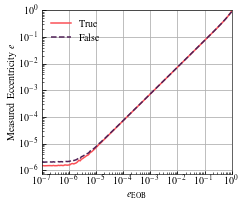

In [53]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
if len(measuredEccsTrue) >= 1:
    ax.plot(eEOBTrue, measuredEccsTrue, label=f"True", ls="-")
if len(measuredEccsFalse) >= 1:
    ax.plot(eEOBFalse, measuredEccsFalse, label=f"False", c=colorsDict[method], ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
ax.set_ylim(top=1.0)
ax.set_xlim(left=1e-7, right=1.0)
# set major ticks
locmaj = mpl.ticker.LogLocator(base=10, numticks=20)
ax.xaxis.set_major_locator(locmaj)
# set minor ticks
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(0.1, 1.0, 0.1),
                                numticks=20)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.grid(which="major")
ax.legend()

In [54]:
fig.suptitle(f"$q={q:.1f}$, $\chi_{{1z}}={chi1:.1f}$, $\chi_{{2z}}={chi2:.1f}$")
fig.subplots_adjust(left=0.16, right=0.96, top=0.9)
fig.savefig(f"../../../public_html/EccDefinition/test_eob_vs_measured_ecc_resamp_compare_set_{key}_method_{method}.pdf")

  0%|                                                                                                                                                                                      | 0/150 [00:00<?, ?it/s]

1e-07


/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:425: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
  1%|█▏                                                                                                                                                                            | 1/150 [00:02<07:14,  2.91s/it]

1.1142428752325099e-07


  1%|██▎                                                                                                                                                                           | 2/150 [00:05<06:58,  2.83s/it]

1.2415371850064104e-07


  2%|███▍                                                                                                                                                                          | 3/150 [00:08<06:51,  2.80s/it]

1.3833739627296223e-07


  3%|████▋                                                                                                                                                                         | 4/150 [00:11<06:47,  2.79s/it]

1.5414145817536454e-07


  3%|█████▊                                                                                                                                                                        | 5/150 [00:13<06:43,  2.78s/it]

1.7175102154984983e-07


  4%|██████▉                                                                                                                                                                       | 6/150 [00:16<06:39,  2.78s/it]

1.9137235207582544e-07


  5%|████████                                                                                                                                                                      | 7/150 [00:19<06:39,  2.79s/it]

2.1323527981697593e-07


  5%|█████████▎                                                                                                                                                                    | 8/150 [00:22<06:47,  2.87s/it]

2.3759589128427652e-07


  6%|██████████▍                                                                                                                                                                   | 9/150 [00:25<06:56,  2.95s/it]

2.647395290480231e-07


  7%|███████████▌                                                                                                                                                                 | 10/150 [00:28<06:54,  2.96s/it]

2.949841340341698e-07


  7%|████████████▋                                                                                                                                                                | 11/150 [00:31<06:45,  2.92s/it]

3.286839696542055e-07


  8%|█████████████▊                                                                                                                                                               | 12/150 [00:34<06:41,  2.91s/it]

3.662337713903369e-07


  9%|██████████████▉                                                                                                                                                              | 13/150 [00:37<06:46,  2.97s/it]

4.0807337044121557e-07


  9%|████████████████▏                                                                                                                                                            | 14/150 [00:40<06:38,  2.93s/it]

4.5469284558624114e-07


 10%|█████████████████▎                                                                                                                                                           | 15/150 [00:43<06:32,  2.91s/it]

5.066382636136649e-07


 11%|██████████████████▍                                                                                                                                                          | 16/150 [00:46<06:25,  2.88s/it]

5.645180755516963e-07


 11%|███████████████████▌                                                                                                                                                         | 17/150 [00:48<06:23,  2.88s/it]

6.290102436234467e-07


 12%|████████████████████▊                                                                                                                                                        | 18/150 [00:51<06:21,  2.89s/it]

7.008701824056906e-07


 13%|█████████████████████▉                                                                                                                                                       | 19/150 [00:54<06:15,  2.87s/it]

7.809396072084504e-07


 13%|███████████████████████                                                                                                                                                      | 20/150 [00:57<06:17,  2.91s/it]

8.701563933188907e-07


 14%|████████████████████████▏                                                                                                                                                    | 21/150 [01:00<06:11,  2.88s/it]

9.695655615935915e-07


 15%|█████████████████████████▎                                                                                                                                                   | 22/150 [01:03<06:04,  2.85s/it]

1.0803315190764665e-06


 15%|██████████████████████████▌                                                                                                                                                  | 23/150 [01:06<05:58,  2.82s/it]

1.2037516980200695e-06


 16%|███████████████████████████▋                                                                                                                                                 | 24/150 [01:08<05:53,  2.81s/it]

1.3412717530678983e-06


 17%|████████████████████████████▊                                                                                                                                                | 25/150 [01:11<05:56,  2.85s/it]

1.494502494606524e-06


 17%|█████████████████████████████▉                                                                                                                                               | 26/150 [01:14<05:53,  2.85s/it]

1.665238756632532e-06


 18%|███████████████████████████████▏                                                                                                                                             | 27/150 [01:17<05:48,  2.84s/it]

1.8554804201388458e-06


 19%|████████████████████████████████▎                                                                                                                                            | 28/150 [01:20<05:44,  2.83s/it]

2.067455838273133e-06


 19%|█████████████████████████████████▍                                                                                                                                           | 29/150 [01:22<05:41,  2.82s/it]

2.3036479376536947e-06


 20%|██████████████████████████████████▌                                                                                                                                          | 30/150 [01:25<05:38,  2.82s/it]

2.5668233015746943e-06


 21%|███████████████████████████████████▊                                                                                                                                         | 31/150 [01:28<05:36,  2.83s/it]

2.8600645757603915e-06


 21%|████████████████████████████████████▉                                                                                                                                        | 32/150 [01:31<05:33,  2.83s/it]

3.186806576245907e-06


 22%|██████████████████████████████████████                                                                                                                                       | 33/150 [01:34<05:36,  2.87s/it]

3.5508765223261173e-06


 23%|███████████████████████████████████████▏                                                                                                                                     | 34/150 [01:37<05:40,  2.94s/it]

3.956538865832268e-06


 23%|████████████████████████████████████████▎                                                                                                                                    | 35/150 [01:40<05:34,  2.91s/it]

4.40854524183412e-06


 24%|█████████████████████████████████████████▌                                                                                                                                   | 36/150 [01:43<05:28,  2.89s/it]

4.912190125853851e-06


 25%|██████████████████████████████████████████▋                                                                                                                                  | 37/150 [01:46<05:30,  2.92s/it]

5.47337284952015e-06


 25%|███████████████████████████████████████████▊                                                                                                                                 | 38/150 [01:49<05:33,  2.97s/it]

6.098666701068888e-06


 26%|████████████████████████████████████████████▉                                                                                                                                | 39/150 [01:52<05:28,  2.96s/it]

6.795395920083764e-06


 27%|██████████████████████████████████████████████▏                                                                                                                              | 40/150 [01:55<05:27,  2.98s/it]

7.5717214883374e-06


 27%|███████████████████████████████████████████████▎                                                                                                                             | 41/150 [01:58<05:23,  2.97s/it]

8.436736721624844e-06


 28%|████████████████████████████████████████████████▍                                                                                                                            | 42/150 [02:01<05:19,  2.96s/it]

9.400573782282964e-06


 29%|█████████████████████████████████████████████████▌                                                                                                                           | 43/150 [02:04<05:16,  2.96s/it]

1.047452236000632e-05


 29%|██████████████████████████████████████████████████▋                                                                                                                          | 44/150 [02:07<05:13,  2.96s/it]

1.1671161911100682e-05


 30%|███████████████████████████████████████████████████▉                                                                                                                         | 45/150 [02:10<05:11,  2.97s/it]

1.3004509005128978e-05


 31%|█████████████████████████████████████████████████████                                                                                                                        | 46/150 [02:13<05:10,  2.99s/it]

1.4490181504862008e-05


 31%|██████████████████████████████████████████████████████▏                                                                                                                      | 47/150 [02:16<05:08,  2.99s/it]

1.614558150261838e-05


 32%|███████████████████████████████████████████████████████▎                                                                                                                     | 48/150 [02:19<05:06,  3.01s/it]

1.7990099155778334e-05


 33%|████████████████████████████████████████████████████████▌                                                                                                                    | 49/150 [02:22<05:17,  3.15s/it]

2.00453398090524e-05


 33%|█████████████████████████████████████████████████████████▋                                                                                                                   | 50/150 [02:25<05:13,  3.13s/it]

2.2335377063851234e-05


 34%|██████████████████████████████████████████████████████████▊                                                                                                                  | 51/150 [02:28<05:08,  3.12s/it]

2.4887034759027854e-05


 35%|███████████████████████████████████████████████████████████▉                                                                                                                 | 52/150 [02:31<05:04,  3.11s/it]

2.7730201165910607e-05


 35%|█████████████████████████████████████████████████████████████▏                                                                                                               | 53/150 [02:35<05:03,  3.12s/it]

3.08981790778802e-05


 36%|██████████████████████████████████████████████████████████████▎                                                                                                              | 54/150 [02:38<05:06,  3.19s/it]

3.442807589518621e-05


 37%|███████████████████████████████████████████████████████████████▍                                                                                                             | 55/150 [02:41<05:03,  3.20s/it]

3.836123827417535e-05


 37%|████████████████████████████████████████████████████████████████▌                                                                                                            | 56/150 [02:44<05:01,  3.21s/it]

4.274373643209663e-05


 38%|█████████████████████████████████████████████████████████████████▋                                                                                                           | 57/150 [02:48<05:01,  3.24s/it]

4.762690378027994e-05


 39%|██████████████████████████████████████████████████████████████████▉                                                                                                          | 58/150 [02:51<05:02,  3.29s/it]

5.306793820656121e-05


 39%|████████████████████████████████████████████████████████████████████                                                                                                         | 59/150 [02:55<05:05,  3.35s/it]

5.913057204993993e-05


 40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 60/150 [02:58<05:02,  3.37s/it]

6.588581861506814e-05


 41%|██████████████████████████████████████████████████████████████████████▎                                                                                                      | 61/150 [03:01<04:59,  3.37s/it]

7.341280397070115e-05


 41%|███████████████████████████████████████████████████████████████████████▌                                                                                                     | 62/150 [03:05<04:58,  3.39s/it]

8.179969377519468e-05


 42%|████████████████████████████████████████████████████████████████████████▋                                                                                                    | 63/150 [03:08<04:56,  3.41s/it]

9.114472598521194e-05


 43%|█████████████████████████████████████████████████████████████████████████▊                                                                                                   | 64/150 [03:12<04:55,  3.44s/it]

0.0001015573615440418


 43%|██████████████████████████████████████████████████████████████████████████▉                                                                                                  | 65/150 [03:15<04:55,  3.48s/it]

0.00011315956652786067


 44%|████████████████████████████████████████████████████████████████████████████                                                                                                 | 66/150 [03:19<05:00,  3.57s/it]

0.0001260872407680681


 45%|█████████████████████████████████████████████████████████████████████████████▎                                                                                               | 67/150 [03:23<04:58,  3.59s/it]

0.00014049180968354593


 45%|██████████████████████████████████████████████████████████████████████████████▍                                                                                              | 68/150 [03:26<04:55,  3.60s/it]

0.00015654199796841294


 46%|███████████████████████████████████████████████████████████████████████████████▌                                                                                             | 69/150 [03:30<04:53,  3.62s/it]

0.00017442580591096616


 47%|████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 70/150 [03:34<04:52,  3.65s/it]

0.00019435271149298265


 47%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 71/150 [03:38<04:51,  3.70s/it]

0.00021655612406317566


 48%|███████████████████████████████████████████████████████████████████████████████████                                                                                          | 72/150 [03:41<04:50,  3.72s/it]

0.00024129611832536096


 49%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 73/150 [03:45<04:49,  3.75s/it]

0.0002688624806652944


 49%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 74/150 [03:49<04:47,  3.79s/it]

0.0002995781034986427


 50%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 75/150 [03:53<04:46,  3.83s/it]

0.0003338027673990301


 51%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 76/150 [03:57<04:45,  3.86s/it]

0.0003719373553072644


 51%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 77/150 [04:01<04:45,  3.91s/it]

0.00041442854818394187


 52%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 78/150 [04:05<04:43,  3.94s/it]

0.00046177405710691065


 53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 79/150 [04:09<04:42,  3.98s/it]

0.0005145284530985853


 53%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 80/150 [04:13<04:41,  4.02s/it]

0.0005733096629695033


 54%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 81/150 [04:17<04:40,  4.06s/it]

0.0006388062072657212


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 82/150 [04:21<04:39,  4.11s/it]

0.0007117852651001318


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 83/150 [04:26<04:38,  4.16s/it]

0.000793101660333306


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 84/150 [04:30<04:37,  4.20s/it]

0.0008837078743614603


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 85/150 [04:34<04:36,  4.25s/it]

0.0009846652027941242


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 86/150 [04:39<04:34,  4.29s/it]

0.0010971561867027262


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 87/150 [04:43<04:33,  4.35s/it]

0.0012224984640507844


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 88/150 [04:48<04:32,  4.40s/it]

0.0013621602035512731


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 89/150 [04:52<04:31,  4.45s/it]

0.0015177773017322714


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 90/150 [04:57<04:30,  4.51s/it]

0.0016911725446448068


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 91/150 [05:02<04:30,  4.58s/it]

0.0018843769586593098


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 92/150 [05:07<04:28,  4.63s/it]

0.002099653600438446


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 93/150 [05:11<04:26,  4.68s/it]

0.0023395240647448253


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 94/150 [05:16<04:24,  4.73s/it]

0.002606798020576923


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 95/150 [05:21<04:23,  4.79s/it]

0.002904606121598046


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 96/150 [05:26<04:21,  4.84s/it]

0.0032364366763473628


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 97/150 [05:31<04:19,  4.90s/it]

0.0036061765077612332


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 98/150 [05:36<04:17,  4.96s/it]

0.004018156480603808


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 99/150 [05:41<04:15,  5.01s/it]

0.00447720223008213


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 100/150 [05:47<04:14,  5.08s/it]

0.004988690685844118


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 101/150 [05:52<04:12,  5.16s/it]

0.005558613053440603


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 102/150 [05:57<04:10,  5.23s/it]

0.006193644990970618


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 103/150 [06:03<04:08,  5.30s/it]

0.006901224802908534


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 104/150 [06:08<04:06,  5.37s/it]

0.007689640567018716


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 105/150 [06:14<04:04,  5.44s/it]

0.008568127214899482


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 106/150 [06:20<04:03,  5.54s/it]

0.009546974703287536


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 107/150 [06:26<04:03,  5.66s/it]

0.01063764854316314


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 108/150 [06:32<04:01,  5.74s/it]

0.011852924098447019


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 109/150 [06:38<03:58,  5.81s/it]

0.01320703622736631


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 110/150 [06:44<03:55,  5.90s/it]

0.014715846019280557


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 111/150 [06:50<03:55,  6.03s/it]

0.016397026580002087


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 112/150 [06:56<03:52,  6.12s/it]

0.018270270041765412


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 113/150 [07:03<03:47,  6.16s/it]

0.020357518222611084


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 114/150 [07:09<03:43,  6.21s/it]

0.022683219636960388


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 115/150 [07:15<03:39,  6.27s/it]

0.02527461586781727


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 116/150 [07:22<03:35,  6.34s/it]

0.02816206065495399


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 117/150 [07:28<03:31,  6.40s/it]

0.031379375436648274


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 118/150 [07:35<03:28,  6.53s/it]

0.034964245509531366


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 119/150 [07:44<03:43,  7.20s/it]

0.038958661446875605


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 120/150 [07:53<03:50,  7.68s/it]

0.043409410945776605


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 121/150 [08:01<03:44,  7.74s/it]

0.04836862686437181


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 122/150 [08:08<03:31,  7.56s/it]

0.053894397868406066


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 123/150 [08:15<03:21,  7.46s/it]

0.060051448839817625


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 124/150 [08:22<03:12,  7.42s/it]

0.06691189901715636


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 125/150 [08:30<03:05,  7.44s/it]

0.07455610674814366


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 126/150 [08:37<02:59,  7.48s/it]

0.08307361074919369


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 127/150 [08:45<02:53,  7.56s/it]

0.09256417889712791


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 128/150 [08:53<02:48,  7.65s/it]

0.10313897683787221


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 129/150 [09:01<02:44,  7.83s/it]

0.11492187010036997


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 130/150 [09:09<02:38,  7.92s/it]

0.12805087496773324


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 131/150 [09:18<02:32,  8.03s/it]

0.142679775100086


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 132/150 [09:26<02:26,  8.16s/it]

0.1589799228450477


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 133/150 [09:35<02:20,  8.29s/it]

0.17714224633510853


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 134/150 [09:43<02:14,  8.43s/it]

0.19737948588157686


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 135/150 [09:52<02:08,  8.58s/it]

0.2199286858606028


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 136/150 [10:02<02:03,  8.84s/it]

0.24505397127942602


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 137/150 [10:11<01:57,  9.01s/it]

0.2730496415455325


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 138/150 [10:21<01:49,  9.12s/it]

0.30424361767690034


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 139/150 [10:30<01:41,  9.26s/it]

0.3390012833314499


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 140/150 [10:40<01:34,  9.41s/it]

0.37772976464674546


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 141/150 [10:50<01:26,  9.58s/it]

0.42088269902088976


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 142/150 [11:00<01:17,  9.74s/it]

0.4689655486926553


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 143/150 [11:10<01:09,  9.95s/it]

0.5225415213602959


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 144/150 [11:21<01:00, 10.13s/it]

0.582238167188866


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 145/150 [11:32<00:51, 10.34s/it]

0.6487547294786289


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 146/150 [11:43<00:42, 10.58s/it]

0.722870335094958


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 147/150 [11:54<00:32, 10.83s/it]

0.8054531205964939


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 148/150 [12:06<00:22, 11.18s/it]

0.8974704009584349


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 149/150 [12:19<00:11, 11.72s/it]

1.0


/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:415: UserWarning: time array t_for_ecc_test is too long. Length is 1339265
  warnings.warn("time array t_for_ecc_test is too long."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:415: UserWarning: time array t_for_ecc_test is too long. Length is 1528352
  warnings.warn("time array t_for_ecc_test is too long."
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [12:38<00:00,  5.06s/it]


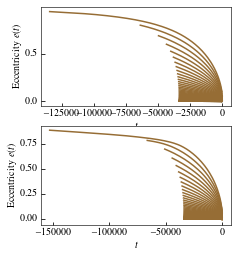

In [55]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 4))
eobEccs = 10**np.linspace(-7, 0., 150)
method = "ResidualAmplitude"
for EOBecc in tqdm(eobEccs):
    print(EOBecc)
    dataDict = getDataDict(0.01, EOBecc)
    tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
    for case in [True, False]:
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": case})
            if case:
                eccMethod.plot_measured_ecc(fig, ax[0])
            else:
                eccMethod.plot_measured_ecc(fig, ax[1])
        except Exception:
            print(f"failed for {EOBecc} for {method}.")

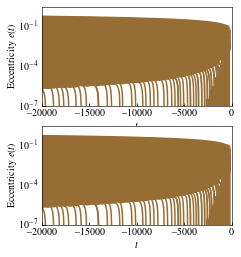

In [64]:
ax[1].set_yscale("log")
ax[1].set_xlim(-20000,0)
ax[0].set_xlim(-20000,0)
ax[0].set_ylim(1e-7,)
ax[1].set_ylim(1e-7,)
fig

### Test for high ecc

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:425: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:370: UserWarning: Phase shift closer to pi than 2 pi detected.
  warnings.warn("Phase shift closer to pi than 2 pi detected.")
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:382: UserWarning: At least a pair of peaks are too far. Maximum orbital phase diff is 10.790380395400291. Times of occurances are [-36212.12625994]
  warnings.warn(f"At least a pair of {extrema_type} are too far."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:382: UserWarning: At least a pair of peaks are too far. Maximum orbital phase diff is 11.206740051356917. Times of occurances are [-33835.63411971]
  warnings.warn(f"At least a pair of {extrema_type} are 

failed for 0.5416666666666666 for FrequencyFits.
failed for 0.625 for FrequencyFits.
failed for 0.6875 for FrequencyFits.
failed for 0.75 for FrequencyFits.
failed for 0.7708333333333333 for FrequencyFits.
failed for 0.8333333333333333 for FrequencyFits.
failed for 0.8958333333333333 for FrequencyFits.
failed for 0.9166666666666666 for FrequencyFits.
failed for 0.9583333333333333 for FrequencyFits.
failed for 0.9791666666666666 for FrequencyFits.
failed for 1.0 for FrequencyFits.


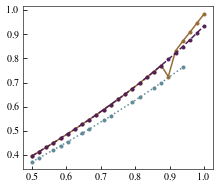

In [23]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
eobEccs = np.linspace(0.5, 1., 25)
for method in ["Amplitude", "ResidualAmplitude", "FrequencyFits"]:
    measuredEccs = []
    eEOB = []
    for EOBecc in eobEccs:
        dataDict = getDataDict(0.01, EOBecc)
        tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": True})
            measuredEccs.append(ecc[0])
            eEOB.append(EOBecc)
        except Exception:
            print(f"failed for {EOBecc} for {method}.")
    if len(measuredEccs) >= 1:
        ax.plot(eEOB, measuredEccs, marker=".", label=f"{method}", c=colorsDict[method], ls=lstyles[method])

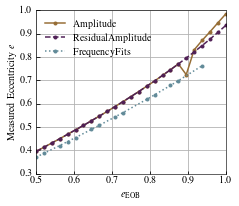

In [24]:
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
ax.set_ylim(0.3, 1.0)
ax.set_xlim(0.5, 1.0)
ax.grid()
fig

In [19]:
fig.subplots_adjust(right=0.96, top=0.98)
fig.savefig("../../../public_html/EccDefinition/high_ecc_test_{key}_{method}.pdf")

### LOW ecc

failed for 0.0001 for Amplitude.
failed for 0.00011006941712522093 for Amplitude.
failed for 0.00012115276586285888 for Amplitude.
failed for 0.0001333521432163324 for Amplitude.
failed for 0.0001467799267622069 for Amplitude.
failed for 0.00016155980984398745 for Amplitude.
failed for 0.00017782794100389227 for Amplitude.
failed for 0.00019573417814876596 for Amplitude.
failed for 0.00021544346900318845 for Amplitude.
failed for 0.00023713737056616554 for Amplitude.
failed for 0.0002610157215682536 for Amplitude.
failed for 0.0002872984833353666 for Amplitude.
failed for 0.00031622776601683794 for Amplitude.
failed for 0.00034807005884284094 for Amplitude.
failed for 0.00038311868495572853 for Amplitude.
failed for 0.00042169650342858224 for Amplitude.
failed for 0.00046415888336127773 for Amplitude.
failed for 0.0005108969774506924 for Amplitude.
failed for 0.0005623413251903491 for Amplitude.
failed for 0.0006189658188912603 for Amplitude.
failed for 0.0006812920690579609 for Amplit

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:364: UserWarning: At least a pair of peaks are too close. Minimum orbital phase diff is 3.131698530400115. Times of occurances are [-3058.68544994]
  warnings.warn(f"At least a pair of {extrema_type} are too close."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:364: UserWarning: At least a pair of peaks are too close. Minimum orbital phase diff is 3.049076331565459. Times of occurances are [-3064.63575906]
  warnings.warn(f"At least a pair of {extrema_type} are too close."


failed for 0.0007498942093324559 for FrequencyFits.


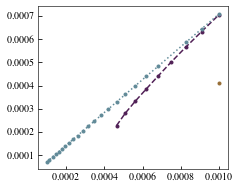

In [16]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
eobEccs = 10**np.linspace(-4.0, -3.0, 25)
for method in ["Amplitude", "ResidualAmplitude", "FrequencyFits"]:
    measuredEccs = []
    eEOB = []
    for EOBecc in eobEccs:
        dataDict = getDataDict(0.01, EOBecc)
        tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": True})
            measuredEccs.append(ecc[0])
            eEOB.append(EOBecc)
        except Exception:
            print(f"failed for {EOBecc} for {method}.")
    if len(measuredEccs) >= 1:
        ax.plot(eEOB, measuredEccs, marker=".", label=f"{method}", c=colorsDict[method], ls=lstyles[method])

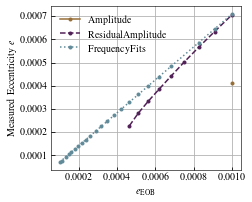

In [17]:
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
# ax.set_ylim(0.3, 1.0)
# ax.set_xlim(0.5, 1.0)
ax.grid()
fig

In [ ]:
fig.subplots_adjust(right=0.96, top=0.98)
fig.savefig("../../../public_html/EccDefinition/low_ecc_test_{key}_{method}.pdf")

In [66]:
# fig.subplots_adjust(left=0.15, bottom=0.13, right=0.98, top=0.91, hspace=0.12)
# fig.savefig("../figs/ecc_and_zero_ecc.pdf")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5191199e50>)

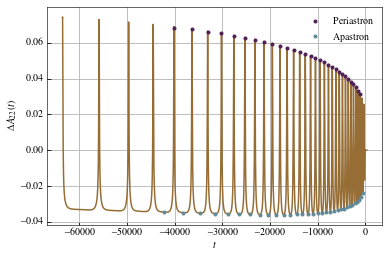

In [67]:
eccMethod.plot_residual_amp22()

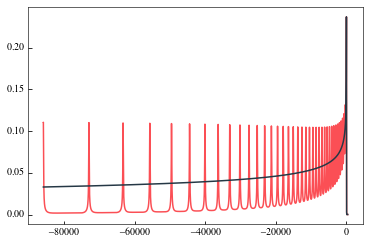

In [62]:
plt.plot(eccMethod.t, eccMethod.amp22)
plt.plot(eccMethod.t, eccMethod.amp22_zeroecc_interp)

In [ ]:
ecc_in = 0.9
dataDict = getDataDict(0.01, ecc_in)

In [32]:
method = "FrequencyFits"
tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                     dataDict=dataDict,
                                                     method=method,
                                                     return_ecc_method=True,
                                                    extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                                                                 "treat_mid_points_between_peaks_as_troughs": False}
                                                    )

(<Figure size 864x2016 with 7 Axes>,
 array([<AxesSubplot:xlabel='$t$', ylabel='Eccentricity $e$'>,
        <AxesSubplot:xlabel='$t$', ylabel='$de/dt$'>,
        <AxesSubplot:xlabel='$t$', ylabel='mean anomaly'>,
        <AxesSubplot:xlabel='$t$', ylabel='$\\omega_{22}$'>,
        <AxesSubplot:xlabel='$t$', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>,
        <AxesSubplot:xlabel='$t$', ylabel='$\\Delta\\omega_{22}$'>,
        <AxesSubplot:xlabel='$t$', ylabel='$\\Delta A_{22}$'>],
       dtype=object))

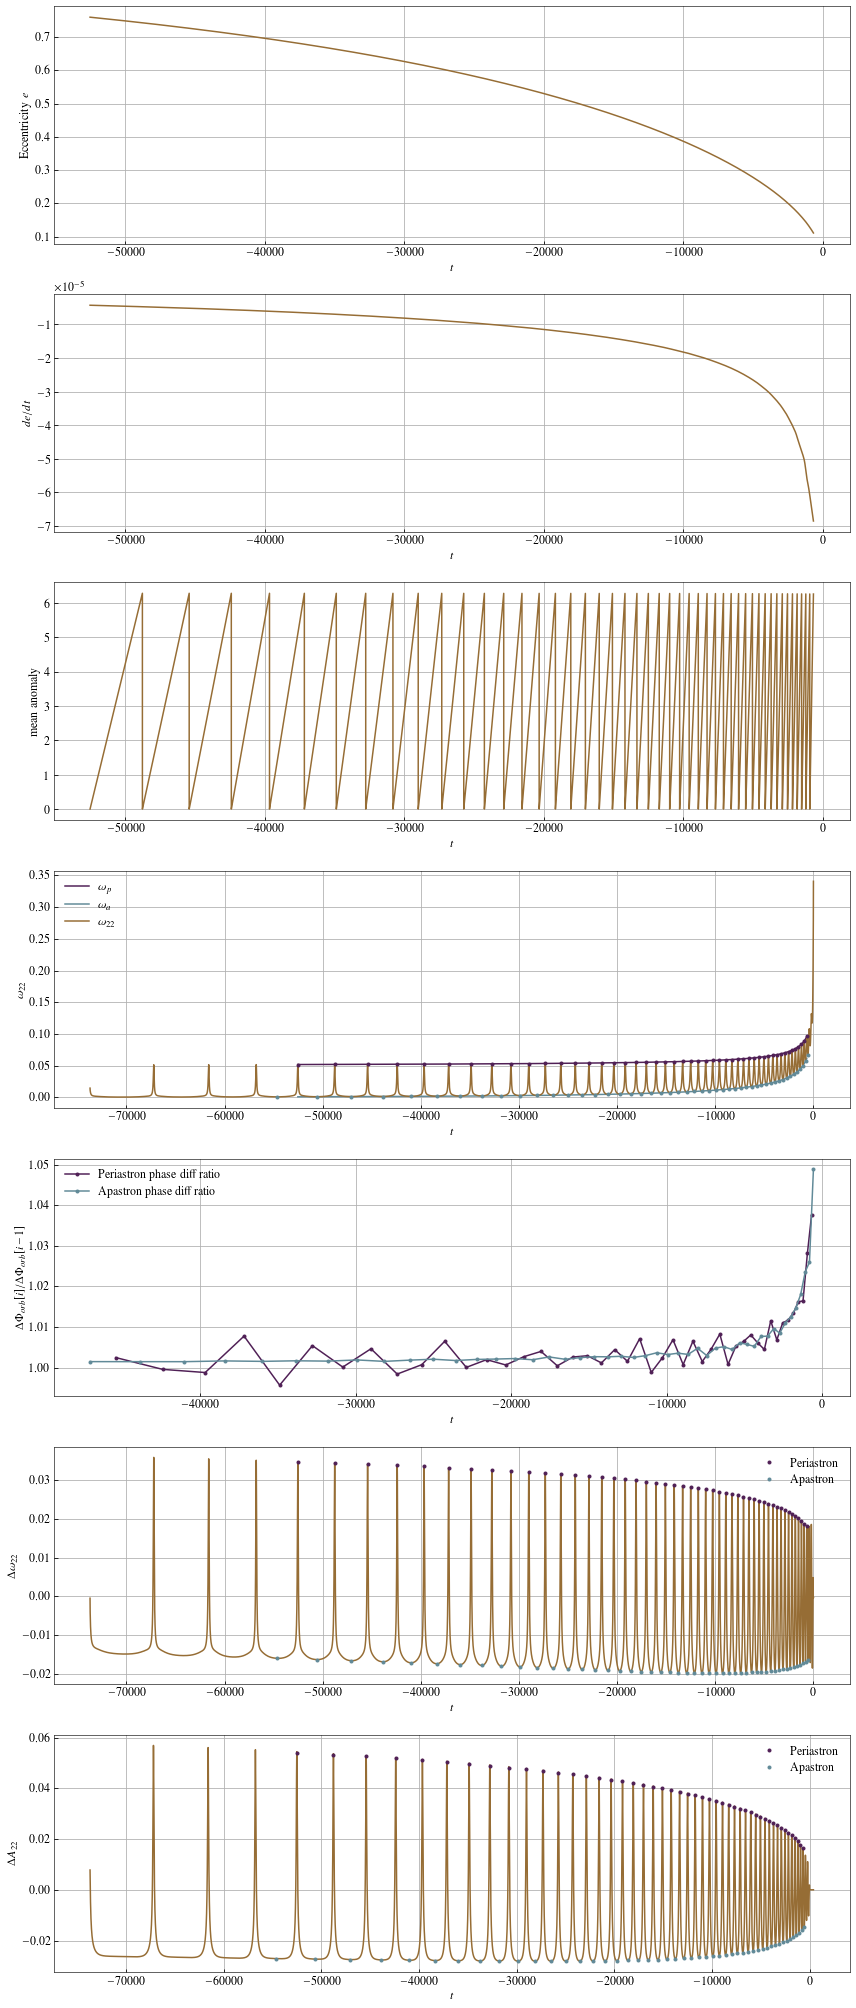

In [33]:
eccMethod.make_diagnostic_plots()

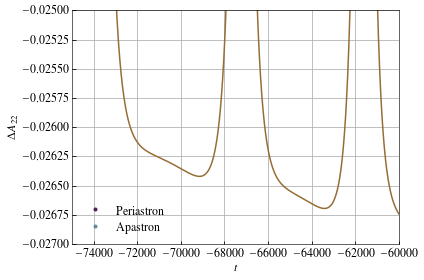

In [34]:
fig, ax = eccMethod.plot_residual_amp22()
ax.set_xlim(-75000, -60000)
ax.set_ylim(-0.027, top=-0.025)
fig.tight_layout()
fig.savefig(f"../../../public_html/EccDefinition/debug_{method}_high_ecc.pdf")

In [42]:
# !pip install ipympl
# %matplotlib widget

(-20000.0, -10000.0)

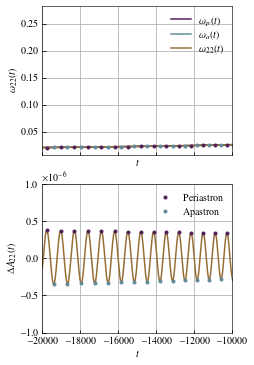

In [46]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 6), sharex=True)
eccMethod.plot_extrema_in_omega22(fig, ax[0])
# ax[0].set_ylim(0.0, 0.07)
# ax[0].set_xlim(right=-40000)

eccMethod.plot_residual_amp22(fig, ax[1])
ax[1].set_ylim(-1e-6, 1e-6)
ax[1].set_xlim(-20000, -10000)
# ax[1].set_ylim(-0.0331, -0.0330)

In [23]:
# fig.subplots_adjust(left=0.2, bottom=0.07, top=0.98, right=0.95, hspace=0.1)
# fig.savefig("../../../public_html/EccDefinition/debug_high_ecc_amp.pdf")

In [24]:
eccMethod.extra_kwargs

{'extrema_finding_kwargs': {'width': 25,
  'height': None,
  'threshold': None,
  'distance': None,
  'prominence': None,
  'wlen': None,
  'rel_height': 0.5,
  'plateau_size': None},
 'treat_mid_points_between_peaks_as_troughs': True,
 'num_orbits_to_exclude_before_merger': 1,
 'debug': True,
 'omega22_averaging_method': 'average_between_extrema'}

In [35]:
import lalsimulation as lalsim

In [42]:
lalsim.SimIMRSEOBNRv4ROMFrequencyOfTime(4.0, 10 * lal.MSUN_SI, 20*lal.MSUN_SI, 0.0, 0.0)

18.67474182712697